# Analisis exploratorio de los datos preprocesados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

## I. Cargar datos

In [2]:
file_path = 'data/processed/data_norte.csv'
df=pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

df.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,Zona
date,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,127.54,97.01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NORTE
2021-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,100.91,69.20,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NORTE
2021-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,59.41,44.93,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NORTE
2021-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,37.04,26.18,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NORTE
2021-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,33.45,23.74,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NORTE


In [3]:
df.shape

(39380, 16)

Diccionario de Variables (Basado en data_limpios.csv): Es vital clasificar las variables por su naturaleza física y estadística. Basado en tu archivo, sugiero esta estructura:

Variable Temporal: date (Debe ser convertida a objeto datetime). Es el índice de tu serie de tiempo.

Variables Categóricas (Nominales): Zona (ej. CENTRO, NORTE). Esta es crucial para segmentar el análisis espacial.

Variables Numéricas (Continuas) - Contaminantes: CO, NO, NO2, NOX, O3, PM10, PM2.5, SO2.

Variables Numéricas (Continuas) - Meteorológicas:

PRS (Presión): Importante para la estabilidad atmosférica.

RAINF (Lluvia): Generalmente tiene muchos ceros (distribución inflada en ceros).

RH (Humedad Relativa): Afecta la formación de aerosoles secundarios.

SR (Radiación Solar): Motor de reacciones fotoquímicas (Ozono).

TOUT (Temperatura): Correlacionada con O3.

WSR (Velocidad del Viento) y WDR (Dirección del Viento): Claves para la dispersión.

Primero se identificarán los datos nulos con el objetivo de facilitar la elección del método de imputación de datos. 

## II. Medidas Estadísticas (Variables Cuantitativas)

In [4]:
cols_numericas = df.select_dtypes(include=[np.number]).columns
estadisticos = df[cols_numericas].describe().T
estadisticos

,count,mean,std,min,25%,50%,75%,max
CO,34489.0,1.026225,0.642382,0.05,0.550,0.92,1.330,9.790
NO,34342.0,12.341783,24.106563,0.50,2.700,3.60,8.200,304.100
NO2,34548.0,13.720476,10.351399,0.00,6.400,10.40,17.900,87.500
NOX,34708.0,25.890092,30.921596,1.20,9.400,14.60,27.700,350.800
O3,36093.0,27.124539,19.652697,1.00,12.000,23.00,38.000,173.000
PM10,37405.0,59.723356,42.205281,2.00,35.000,50.10,73.000,1001.000
PM2.5,27443.0,18.666268,13.239775,1.00,9.545,15.15,24.635,384.020
PRS,36300.0,714.926694,4.408137,669.00,712.200,714.70,717.500,731.600
RAINF,36390.0,0.009311,0.361163,0.00,0.000,0.00,0.000,45.000
RH,24217.0,44.362762,205.468276,-9999.00,31.000,51.00,69.000,151.000


In [5]:
estadisticos['mediana'] = df[cols_numericas].median()
estadisticos['sesgo'] = df[cols_numericas].skew()

estadisticos['mediana']

CO         0.92
NO         3.60
NO2       10.40
NOX       14.60
O3        23.00
PM10      50.10
PM2.5     15.15
PRS      714.70
RAINF      0.00
RH        51.00
SO2        3.40
SR         0.00
TOUT      24.71
WSR        7.30
WDR       73.00
Name: mediana, dtype: float64

## III. Visualización y Distribución
*Histogramas (Análisis de Distribución):
*Boxplots (Diagramas de Caja):
*Mapa de Calor (Correlación de Pearson/Spearman):

In [6]:
sns.set_theme(style="whitegrid")

/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_38076/304494504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_38076/304494504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m0000gn/T/ipykernel_38076/304494504.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
/var/folders/0p/t_nmy1zs1jgc_z9_lggdxk7m

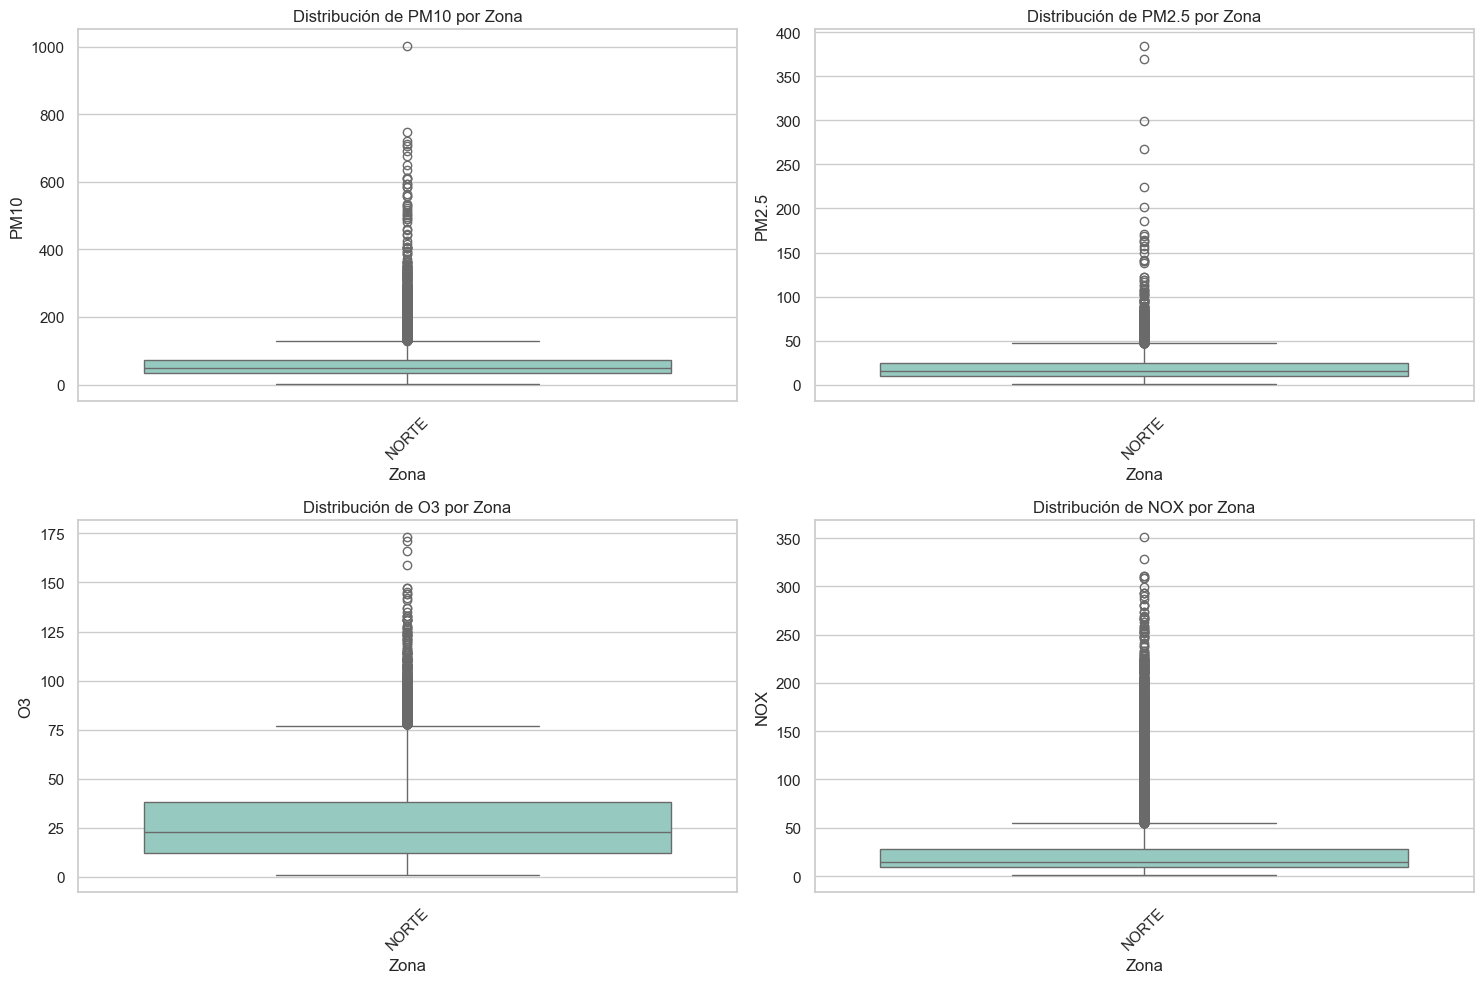

In [7]:
# Contaminantes por Zona
# Esto responde: ¿Qué zona es la más contaminada y cuál tiene más picos extremos?
vars_interes = ['PM10', 'PM2.5', 'O3', 'NOX'] # Puedes agregar más

plt.figure(figsize=(15, 10))
for i, var in enumerate(vars_interes):
    plt.subplot(2, 2, i+1)
    # Ordenamos por mediana para mejor visualización
    sns.boxplot(x='Zona', y=var, data=df, palette="Set3")
    plt.title(f'Distribución de {var} por Zona')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

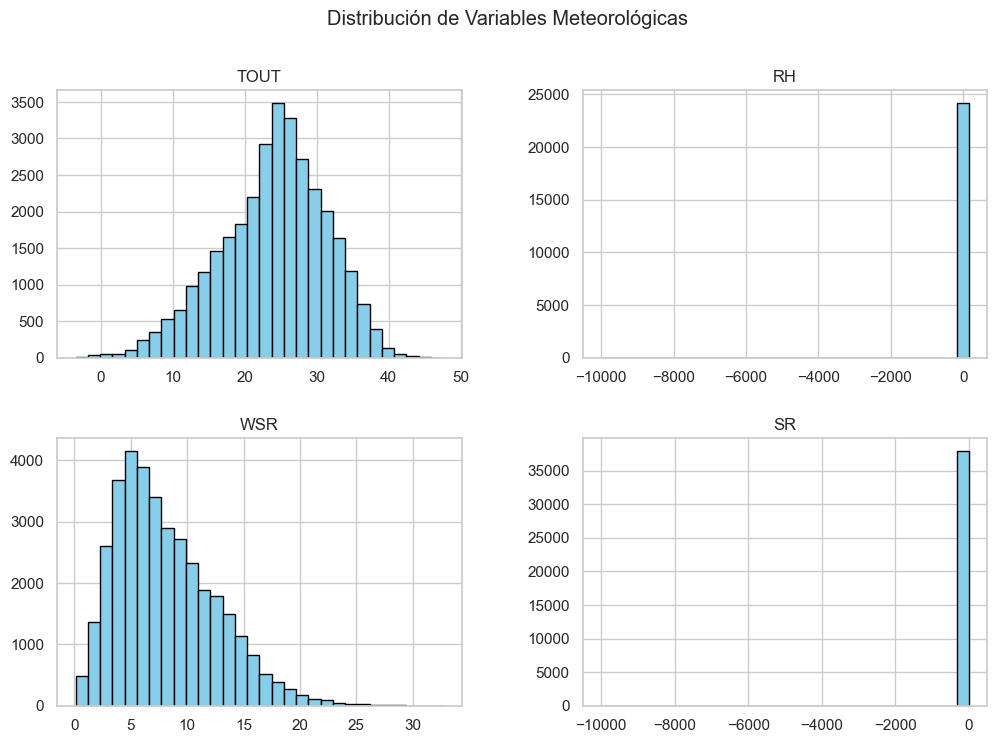

In [8]:
# 2. Histogramas de Variables Meteorológicas
# Esto responde: ¿Cómo se comportan el clima y el viento?
vars_meteo = ['TOUT', 'RH', 'WSR', 'SR']

df[vars_meteo].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Meteorológicas')
plt.show()

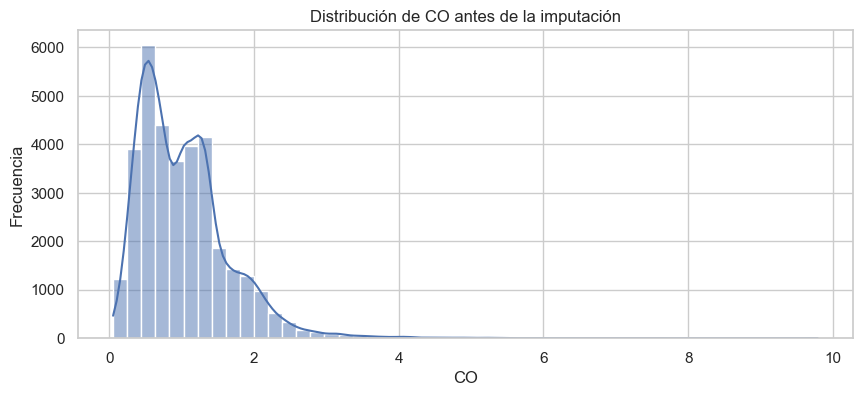

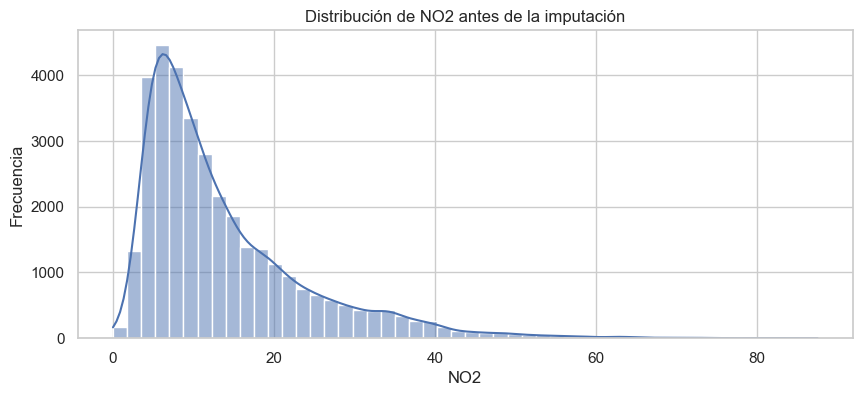

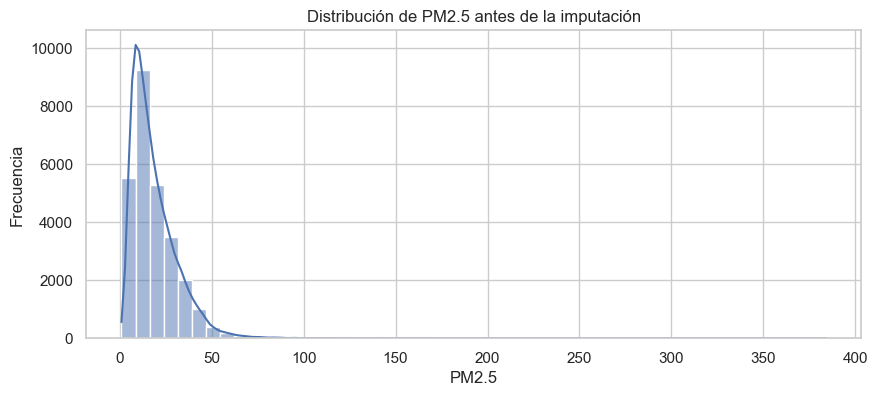

In [9]:
cols=['CO', 'NO2','PM2.5']

for col in cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f'Distribución de {col} antes de la imputación')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()  

## IV. Calidad de los datos

### Deteccion de nulos

In [10]:
def obtener_longitud_brechas(columna_temporal: pd.Series) -> pd.Series:
    """
    Identifica todas las brechas (gaps) de datos faltantes y devuelve
    una Serie que contiene la longitud de cada brecha.
    El output es la data cruda para un histograma.

    Argumentos:
      columna_temporal: Una pd.Series (ej. df['O3']) con un índice.

    Devuelve:
      pd.Series: "Datos para graficar". 
                 Cada valor en la Serie es la longitud de una brecha 
                 de nulos.
    """
    es_nulo = columna_temporal.isnull()
    
    #primero se crea un ID de grupo para cada bloque consecutivo de nulos o no-nulos
    # .diff() detecta el cambio de False a True
    # .ne(0) marca esos cambios
    # .cumsum() asigna un ID único a cada bloque
    group_id = es_nulo.astype(int).diff().ne(0).cumsum()
    
    #filtrar para quedarnos solo con los grupos que SÍ son nulos
    brechas_grupos = group_id[es_nulo]
    
    #contar el tamaño (longitud) de cada grupo (brecha)
    #esto devuelve una Serie donde el índice es el 'group_id' y el valor es su longitud
    longitud_de_cada_brecha = brechas_grupos.value_counts()
    
    #nombrar la Serie para claridad
    longitud_de_cada_brecha.name = "longitud_de_brecha"
    
    #el output es una Serie que lista todas las longitudes
    return longitud_de_cada_brecha

In [11]:
def porcentaje_nulos_por_anio(df_temporal: pd.DataFrame) -> pd.DataFrame:
    """
    Calcula el porcentaje de datos faltantes para cada columna,
    agrupado por año.

    Argumentos:
      df_temporal: pd.DataFrame con un pd.DatetimeIndex.

    Devuelve:
      pd.DataFrame: "Datos para graficar".
                    Índice = Año
                    Columnas = Variables del DataFrame original
                    Valores = Porcentaje de nulos (0-100)
    """
    if not isinstance(df_temporal.index, pd.DatetimeIndex):
        raise ValueError("El DataFrame de entrada debe tener un pd.DatetimeIndex.")

    #agrupar por el atributo year del índice temporal
    grupos_anuales = df_temporal.groupby(df_temporal.index.year)

    #calcular el % de nulos para cada grupo (año)
    # .apply() itera sobre cada grupo
    # df_anio.isnull().sum() cuenta nulos por columna
    # len(df_anio) es el total de registros en ese año
    porcentaje_nulos = grupos_anuales.apply(
        lambda df_anio: (df_anio.isnull().sum() / len(df_anio)) * 100
    )

    porcentaje_nulos.index.name = "Año"
    return porcentaje_nulos

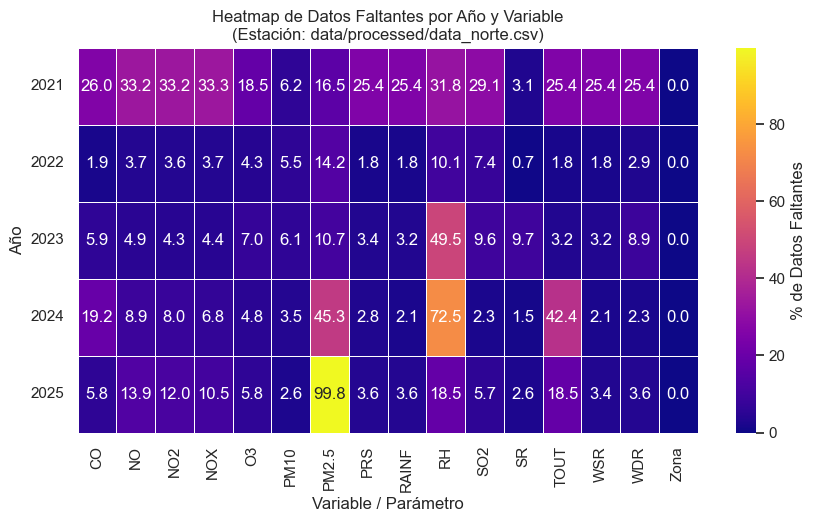

In [12]:
datos_heatmap = porcentaje_nulos_por_anio(df)
plt.figure(figsize=(10, 5)) 
    
sns.heatmap(
        datos_heatmap,
        annot=True,      
        fmt=".1f",      
        cmap='plasma',  
        linewidths=.5,
        cbar_kws={'label': '% de Datos Faltantes'} 
    )
    
plt.title(f'Heatmap de Datos Faltantes por Año y Variable\n(Estación: {file_path})')
plt.ylabel('Año')
plt.xlabel('Variable / Parámetro')
plt.yticks(rotation=0) 
plt.show()

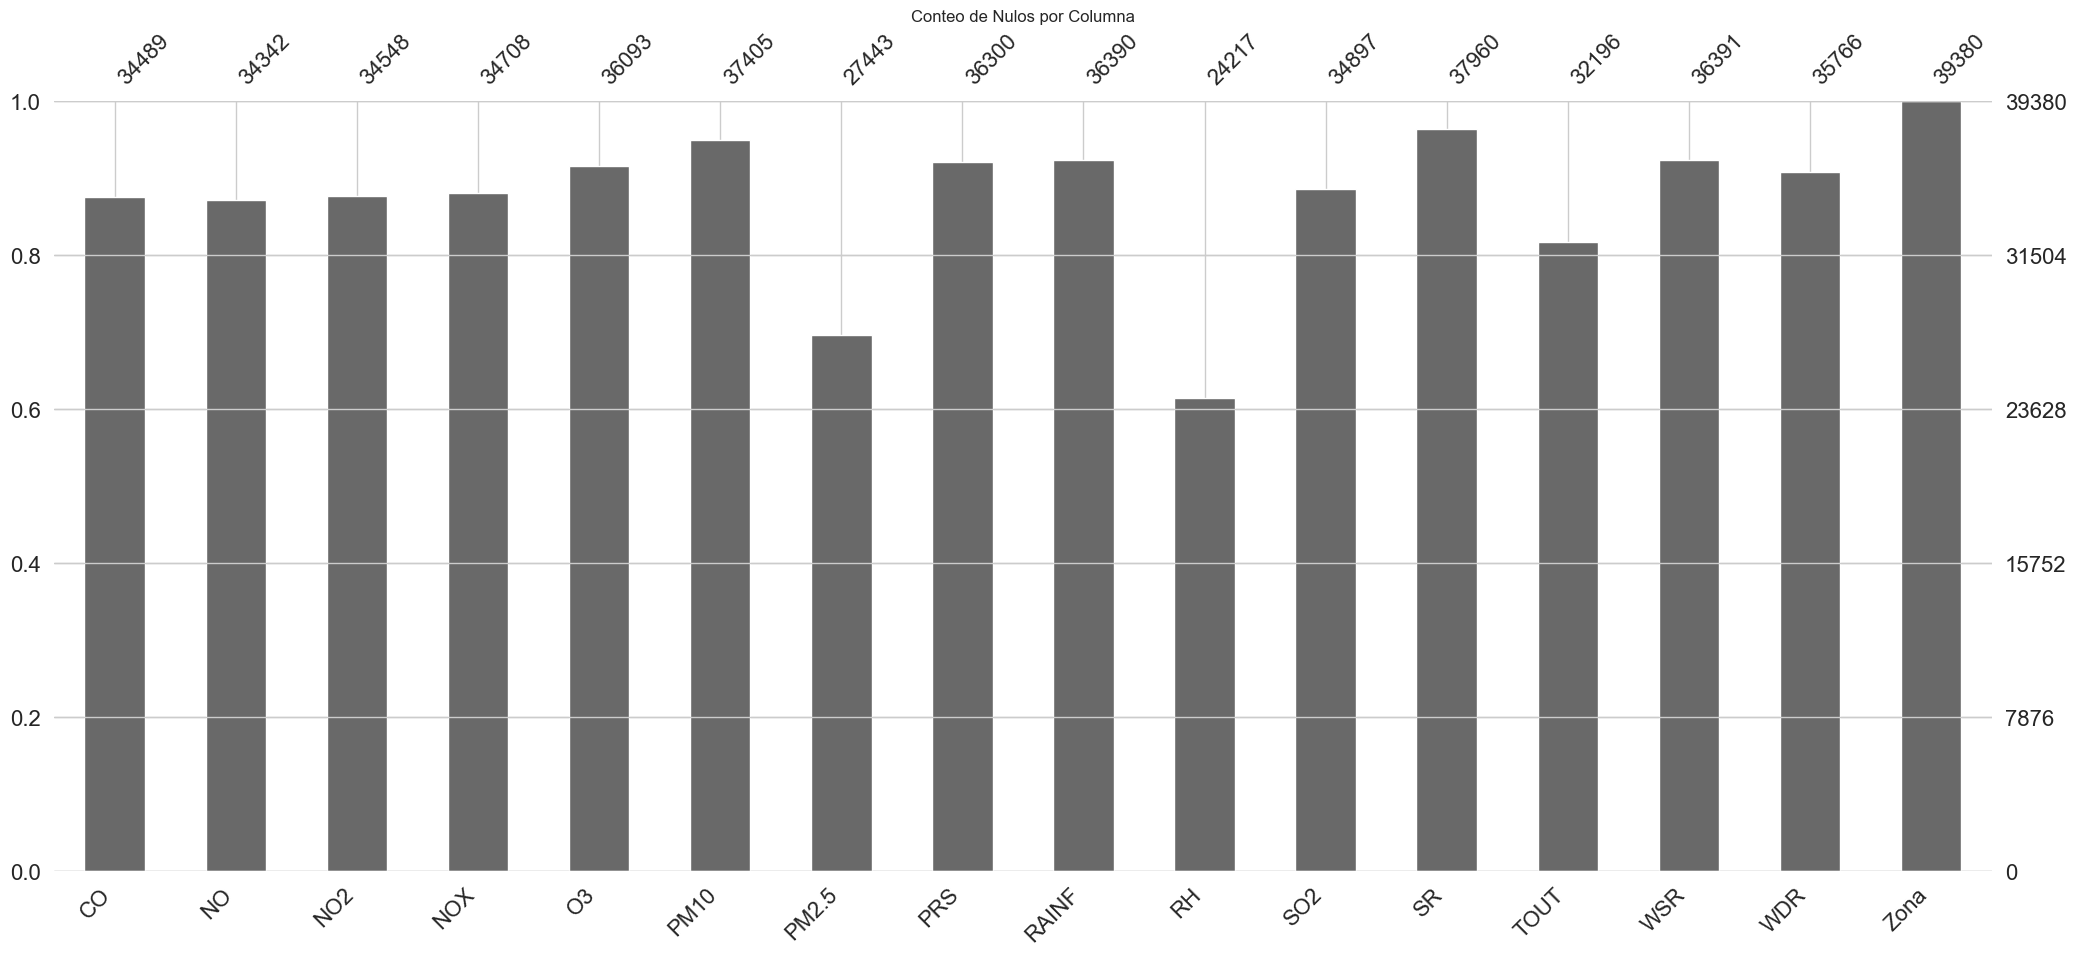

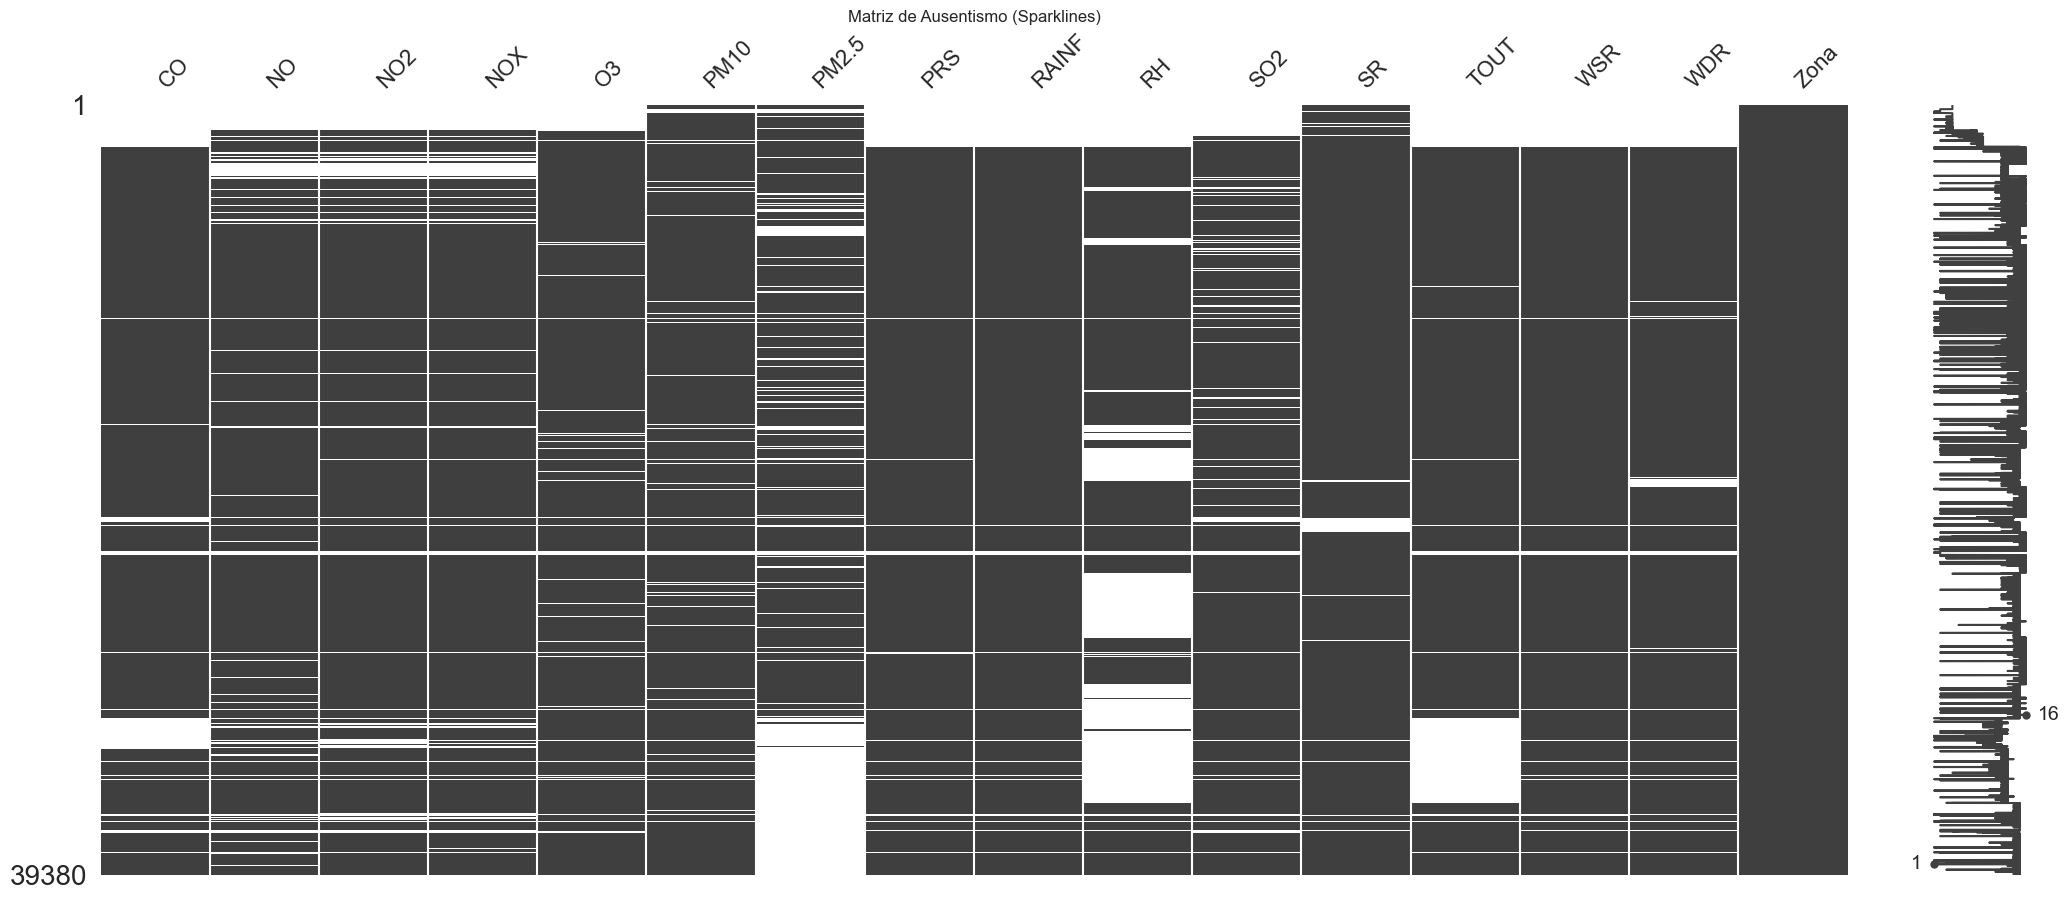

In [13]:
msno.bar(df)
plt.title('Conteo de Nulos por Columna')
plt.show()
msno.matrix(df)
plt.title('Matriz de Ausentismo (Sparklines)')
plt.show()

Datos para el histograma:
count     251.000000
mean       19.486056
std       168.292658
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      2158.000000
Name: longitud_de_brecha, dtype: float64


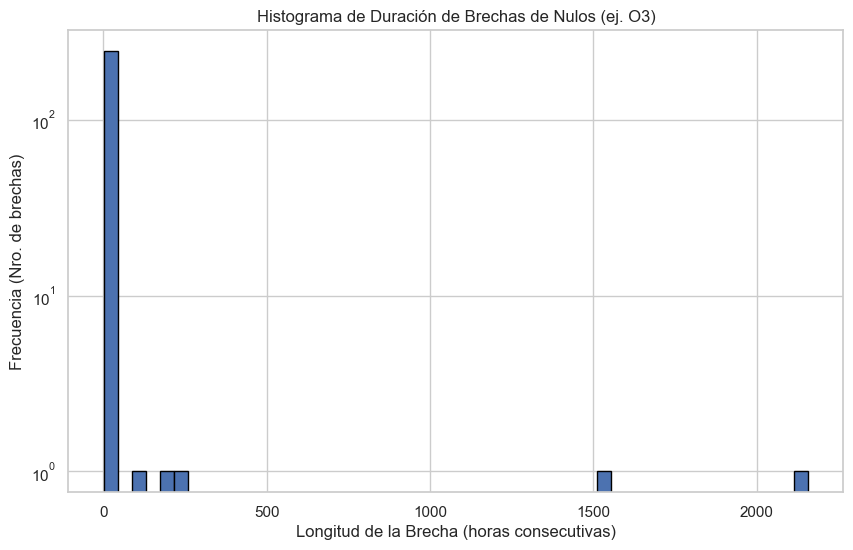

In [14]:
no_series = df['CO']
datos_hist = obtener_longitud_brechas(no_series)
print("Datos para el histograma:")
print(datos_hist.describe())
#
import matplotlib.pyplot as plt
#
plt.figure(figsize=(10, 6))
datos_hist.plot(kind='hist', 
                 bins=50, 
                 title='Histograma de Duración de Brechas de Nulos (ej. O3)',
                 edgecolor='black')
plt.xlabel('Longitud de la Brecha (horas consecutivas)')
plt.ylabel('Frecuencia (Nro. de brechas)')
plt.yscale('log') 
plt.show()

# En proceso...

Datos filtrados. 744 registros encontrados para Mayo 2025.


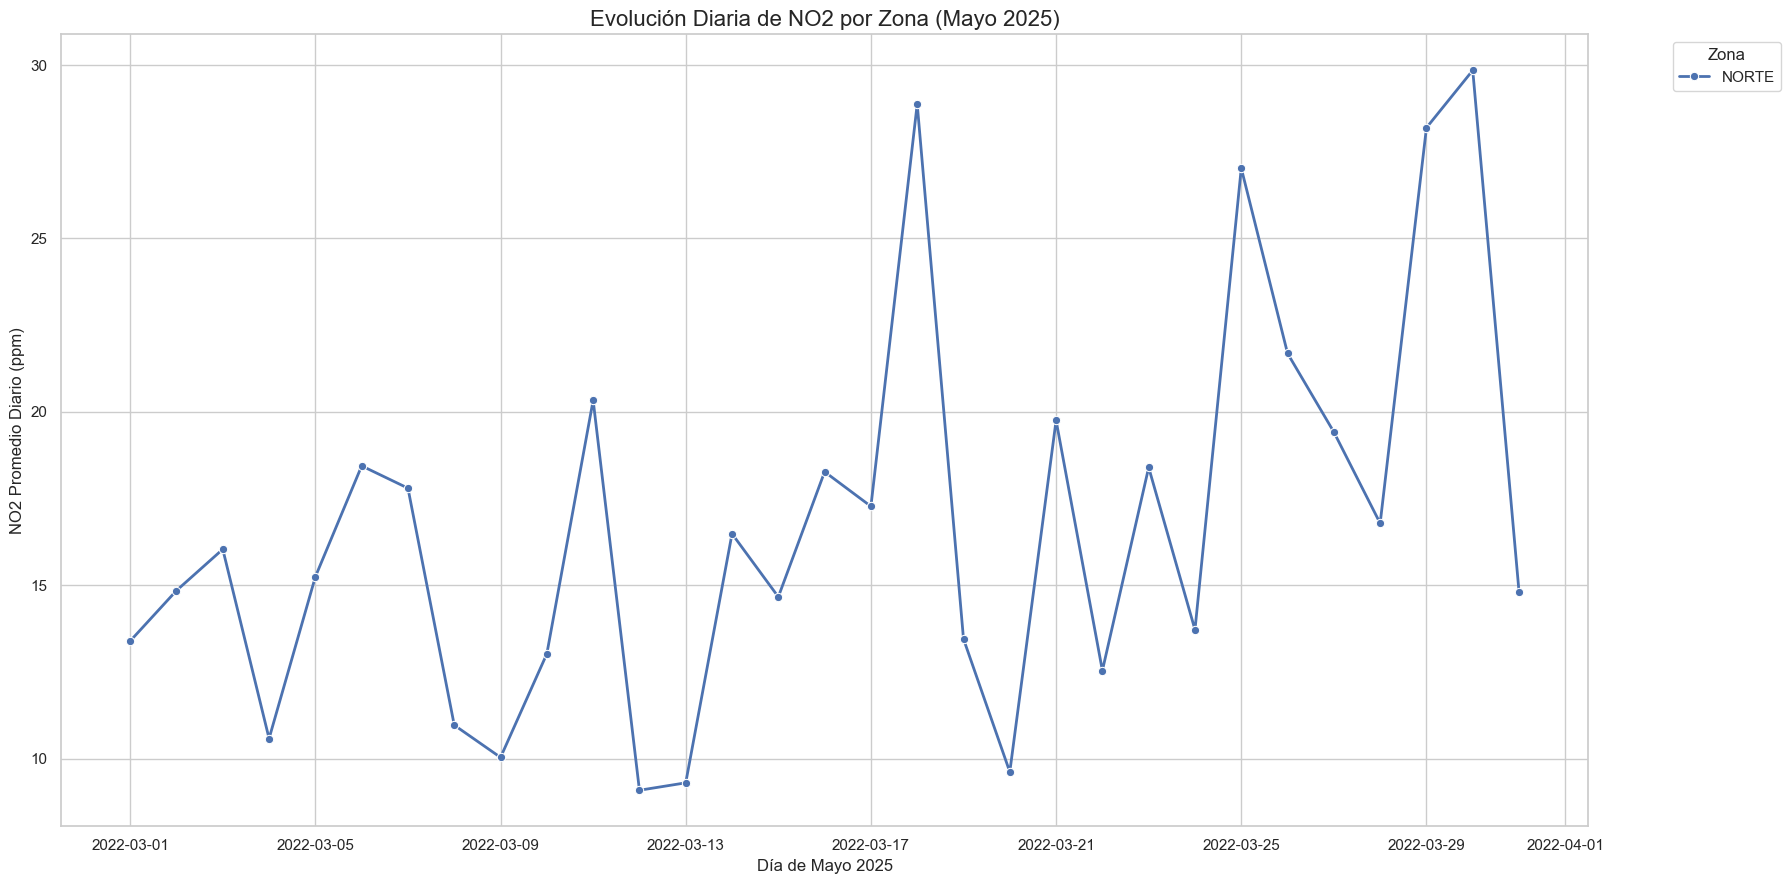

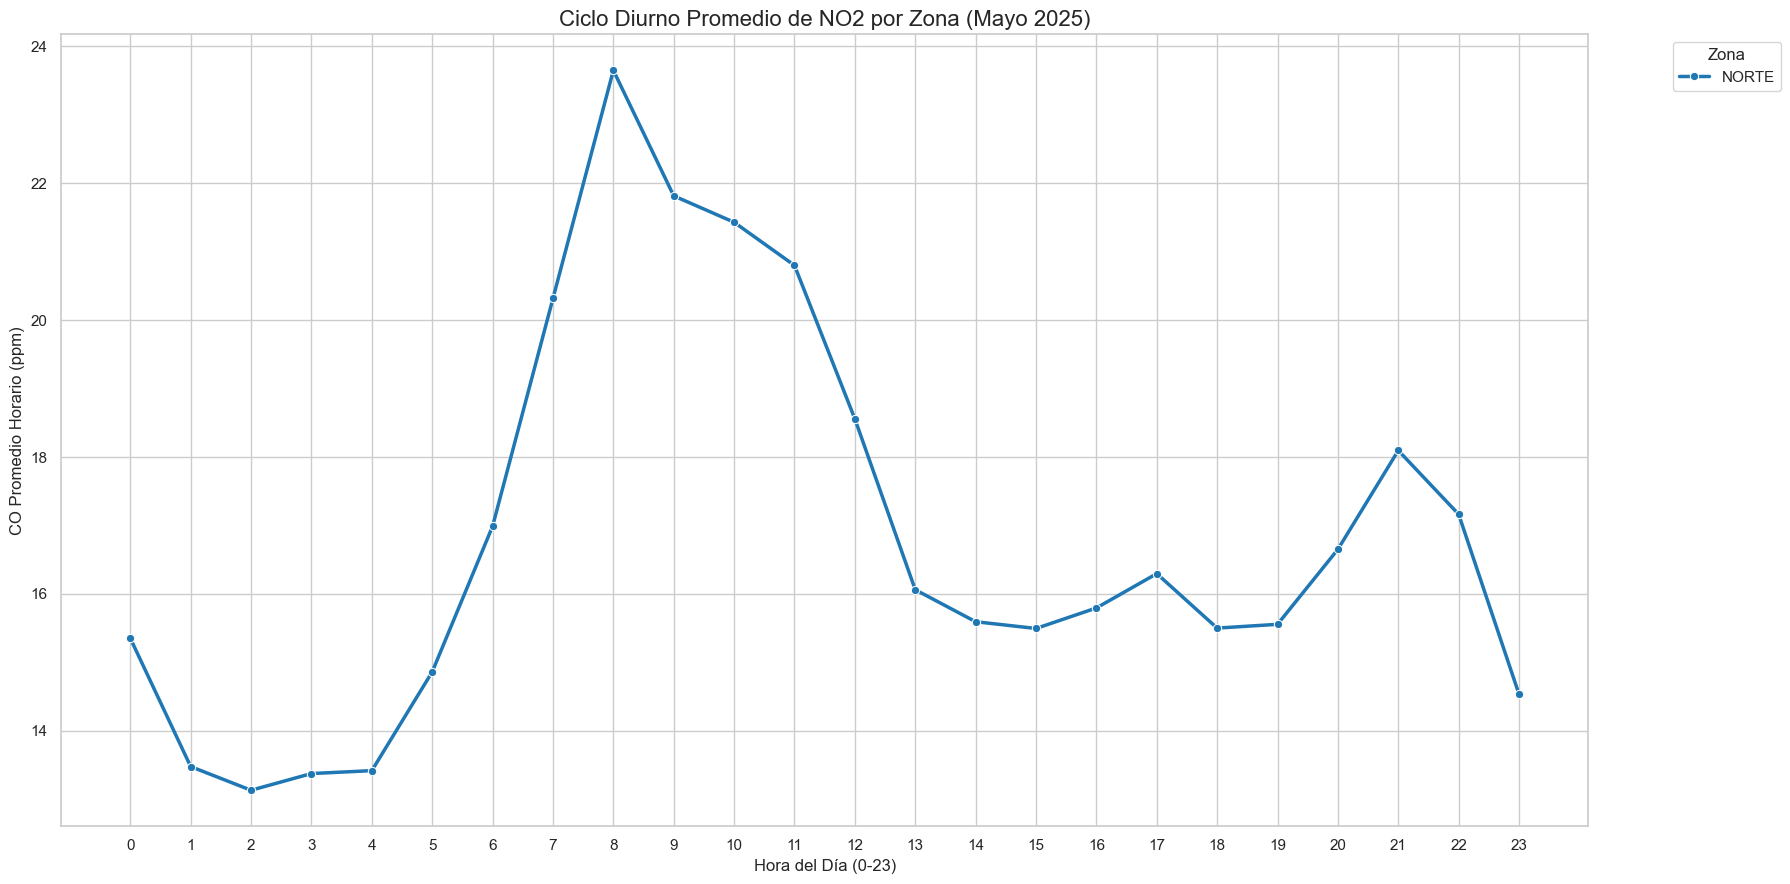

In [15]:
#ordnar df
df.sort_index(inplace=True)

#Filtrar el DataFrame para el rango de fechas (Mayo 2025)
df_mayo_2025 = df.loc['2022-03-01':'2022-03-31'].copy()

if df_mayo_2025.empty:
    print("Advertencia: No se encontraron datos para Mayo de 2025.")
else:
    print(f"Datos filtrados. {df_mayo_2025.shape[0]} registros encontrados para Mayo 2025.")


if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    daily_co = df_mayo_2025.groupby('Zona')['PM2.5'].resample('D').mean().reset_index()

    sns.lineplot(
        data=daily_co, 
        x='date', 
        y='PM2.5', 
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2
    )
    
    plt.title('Evolución Diaria de NO2 por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Día de Mayo 2025')
    plt.ylabel('NO2 Promedio Diario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Diario): No hay datos para Mayo de 2025.")

#PATRÓN DE CICLO DIURNO (Promedio Horario)
if not df_mayo_2025.empty:
    plt.figure(figsize=(18, 9))
    
    #columna 'Hora' para agrupar
    df_mayo_2025['Hora'] = df_mayo_2025.index.hour
    
    #Agrupar por Zona y Hora, luego calcular la media de CO
    diurnal_cycle = df_mayo_2025.groupby(['Zona', 'Hora'])['PM2.5'].mean().reset_index()

    sns.lineplot(
        data=diurnal_cycle,
        x='Hora',
        y='PM2.5',
        hue='Zona',
        style='Zona',
        markers=True,
        linewidth=2.5,
        palette='tab10'
    )
    
    plt.title('Ciclo Diurno Promedio de NO2 por Zona (Mayo 2025)', fontsize=16)
    plt.xlabel('Hora del Día (0-23)')
    plt.ylabel('CO Promedio Horario (ppm)')
    plt.legend(title='Zona', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, 24))
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()

else:
    print("No se puede graficar (Ciclo Diurno): No hay datos.")

Calculando la matriz de correlación...
Generando el heatmap...

--- Hallazgos Clave de Correlación ---

Correlaciones más fuertes con O3:
O3      1.000000
TOUT    0.520241
WSR     0.394046
SO2     0.222278
SR      0.008649
Name: O3, dtype: float64

Correlaciones más fuertes con PM2.5:
PM2.5    1.000000
PM10     0.570905
CO       0.475132
NOX      0.420278
NO       0.386790
Name: PM2.5, dtype: float64

Correlaciones (Negativas) más fuertes con PM2.5 (Dispersión):
PRS     -0.211636
WSR     -0.148472
O3      -0.051556
RH      -0.007278
RAINF   -0.006522
Name: PM2.5, dtype: float64


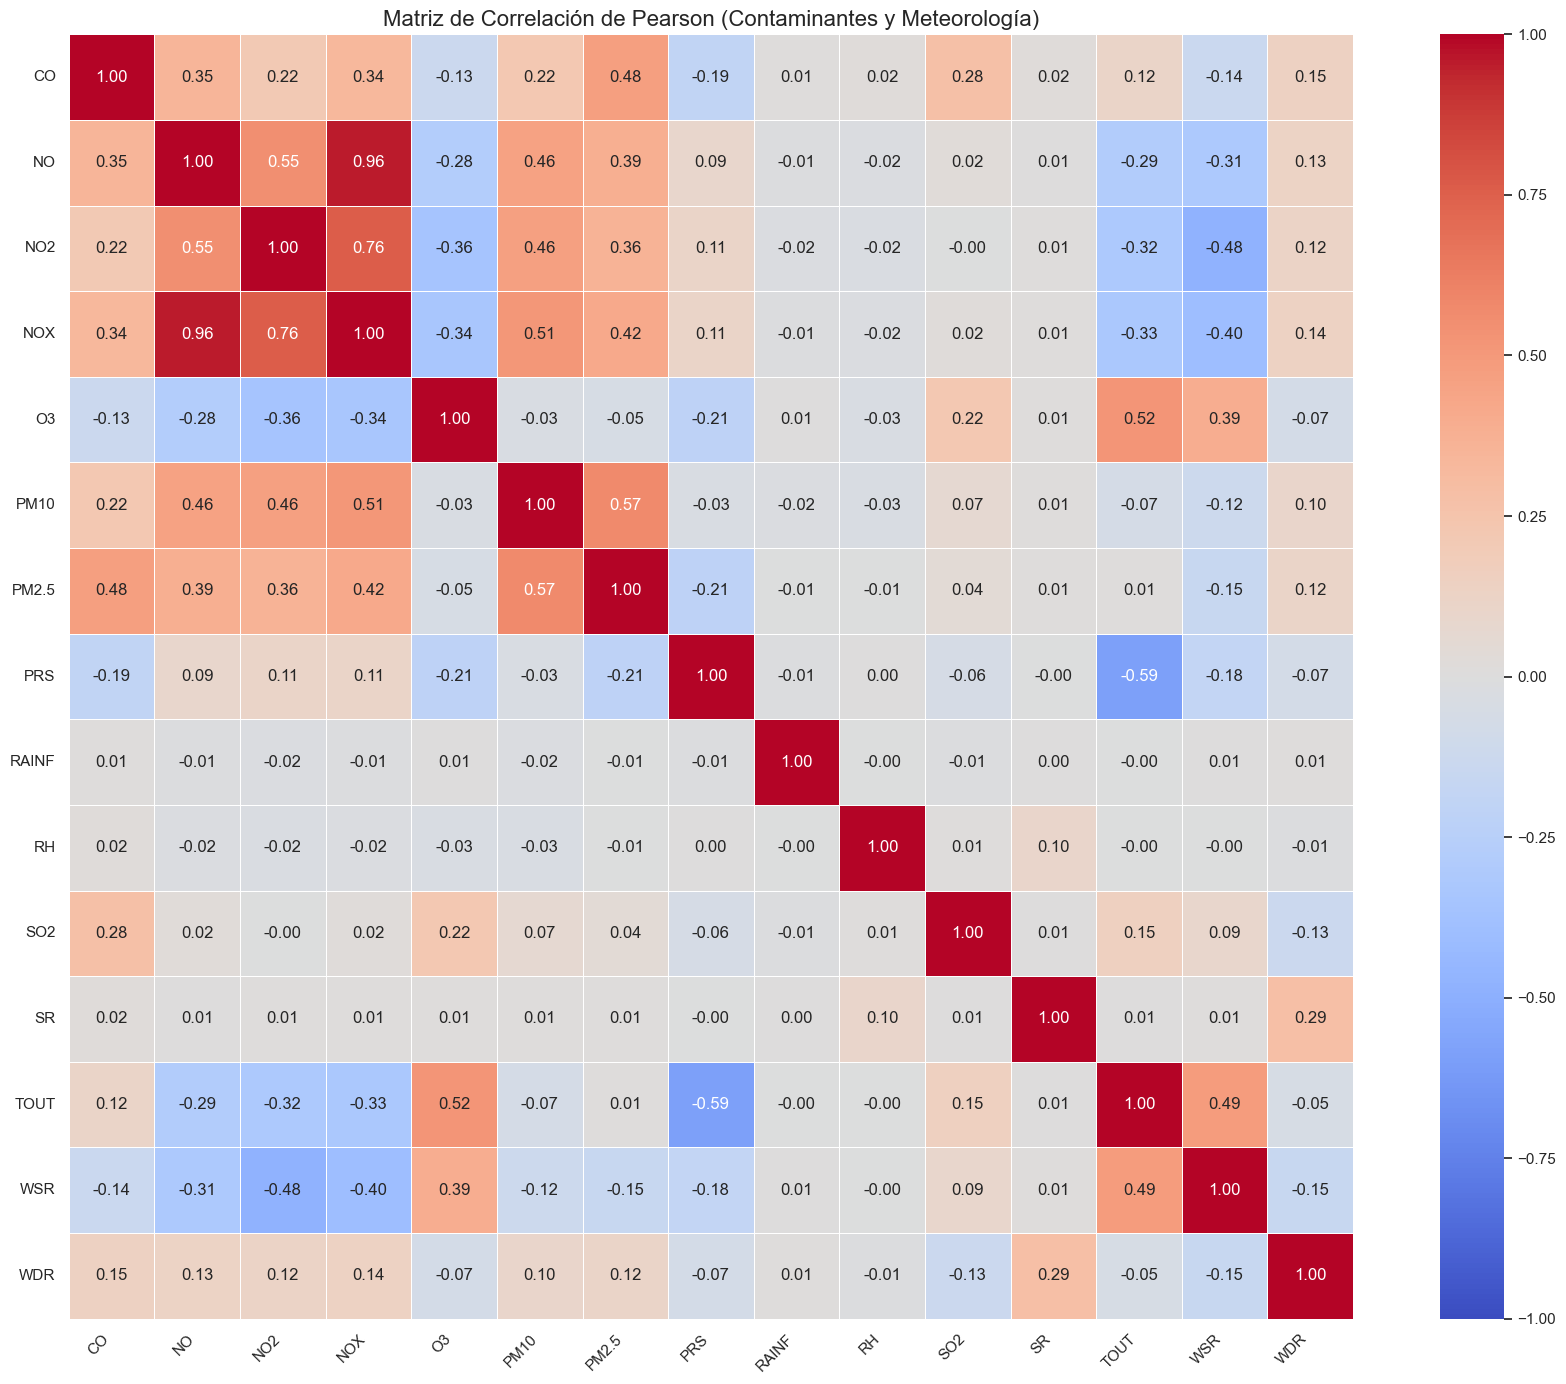

In [16]:
numeric_cols = df.select_dtypes(include=['float64']).columns

print("Calculando la matriz de correlación...")
corr_matrix = df[numeric_cols].corr(method='pearson')

print("Generando el heatmap...")
plt.figure(figsize=(18, 14)) # Tamaño amplio para 15x15 variables

sns.heatmap(
    corr_matrix, 
    annot=True,       # Mostrar los coeficientes
    fmt=".2f",        # Formato de 2 decimales
    cmap='coolwarm',  # Colormap divergente (azul-blanco-rojo)
    vmin=-1,          # Rango mínimo del color
    vmax=1,           # Rango máximo del color
    square=True,      # Forzar celdas cuadradas
    linewidths=.5     # Líneas ligeras entre celdas
)

plt.title('Matriz de Correlación de Pearson (Contaminantes y Meteorología)', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas X para legibilidad
plt.yticks(rotation=0) # Mantener etiquetas Y horizontales
plt.tight_layout() # Ajustar para que no se corten las etiquetas


print("\n--- Hallazgos Clave de Correlación ---")
print("\nCorrelaciones más fuertes con O3:")
print(corr_matrix['O3'].sort_values(ascending=False).head(5))

print("\nCorrelaciones más fuertes con PM2.5:")
print(corr_matrix['PM2.5'].sort_values(ascending=False).head(5))

print("\nCorrelaciones (Negativas) más fuertes con PM2.5 (Dispersión):")
print(corr_matrix['PM2.5'].sort_values(ascending=True).head(5))